파이토치는 일련의 노드로구성된 계산 그래프를 중심으로 만들어졌다.

파이토치의 계산그래프는 사전에 정의되는 것이 아니라 **실행 과정에서 암묵적으로 정의**된다. 

파이토치에서는 **Tensor**를 사용한다.

**Tensor는 Numpy 배열과 비슷하지만, 자동 미분을 위해 최적화되어 있고 GPU에서 실행할 수 있다는 특징이 있다.**

파이토치에 대해 알아보기 전에, **Tensor**에 대해 먼저 살펴보자.

In [1]:
import torch
import numpy as np

np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


**from_numpy()** 함수는 Numpy 배열을 Tensor로 바꾸어주고, 파이썬의 list는 **tensor()** 함수를 통해 Tensor로 변환할 수 있다.

Numpy 배열과 비슷하게 **shape, dtype**과 같은 속성을 확인할 수 있다.

In [2]:
t_ones = torch.ones(2, 3)
t_ones.shape

print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


**rand()** 함수를 통해 주어진 크기만큼 0 ~ 1 사이 실수값을 랜덤하게 가지는 Tensor를 생성할 수도 있다.   

In [3]:
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

tensor([[0.0865, 0.6436, 0.0689],
        [0.4161, 0.9674, 0.7088]])


모델이나 연산에 맞는 크기의 입력을 준비하려면 Tensor의 **dtype, shape**를 조작할 수 있어야 한다.

**tensor.to() 함수**는 tensor의 dtype을 원하는 type으로 바꿀 수 있다.

**torch.transpose() 함수**는 tensor를 전치할 수 있다.

**tensor.reshape() 함수**는 tensor의 크기를 바꿀 수 있다.

**torch.sqeeze() 함수**는 tensor에서 불필요한 차원을 삭제할 수 있다.
- 아래 예시에서 **크기가 1인 차원은 불필요하다.**

In [4]:
# 데이터 타입 변경
t_a_new = t_a.to(torch.int64)
print("t_a_new.dtype:", t_a_new.dtype)

# Tensor Transpose
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print('transpose:', t.shape, '-->', t_tr.shape)

# 1D -> 2D
t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print("t_reshape.shape:", t_reshape.shape)

# 차원 삭제
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print('squeeze:', t.shape, '-->', t_sqz.shape)

t_a_new.dtype: torch.int64
transpose: torch.Size([3, 5]) --> torch.Size([5, 3])
t_reshape.shape: torch.Size([5, 6])
squeeze: torch.Size([1, 2, 1, 4, 1]) --> torch.Size([1, 2, 4, 1])


파이토치를 이용하여 모델을 만드려면 선형대수학 연산과 같은 수학 연산이 필수적이다.

선형대수학 연산을 다루기 위해 순서대로 **Element-wise multiplication, Matrix multiplication, Norm operation** 등을 알아보자.

Element-wise multiplication은 **multiply() 함수**를 이용한다.

특정 축을 기준으로 **평균, 합, 표준편차**를 계산하려면 **mean(), sum(), std()함수**를 이용하고, **axis =** 속성을 통해 어느 차원을 기준으로 할지 정할 수 있다. .

행렬 곱은 **torch.matmul() 함수**를이용할 수 있다. 

Tensor의 $L^p$ Norm을 계산하려면 **torch.linalg.norm() 함수**를 이용한다. **ord = $p$**이고 **dim=**은 적용할 차원을 의미한다.

In [5]:
# 먼저 두 개의 랜덤한 Tensor를 만들자
torch.manual_seed(1)
# t1은 [-1, 1) 사이의 Uniform distribution 
t1 = 2 * torch.rand(5, 2) - 1
# t2는 Normal distribution
t2 = torch.normal(mean = 0, std = 1, size = (5,2))

t3 = torch.multiply(t1, t2)
print("Element-wise mul:\n", t3)
print()

t4 = torch.mean(t1, axis = 0)
print("mean of t1:\n", t4)
print()

t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print("t1 x t2^T:\n", t5)
print()

t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print("t1^T x t2:\n", t6)
print()

norm_t1 = torch.linalg.norm(t1, ord = 2, dim=1)
print("norm_t1:\n", norm_t1)
print()

# norm 결과가 맞는지 확인
print("norm check:\n", np.sqrt(np.sum(np.square(t1.numpy()), axis=1)))

Element-wise mul:
 tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

mean of t1:
 tensor([-0.1373,  0.2028])

t1 x t2^T:
 tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])

t1^T x t2:
 tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])

norm_t1:
 tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])

norm check:
 [0.678 0.508 1.116 0.549 0.185]


필요에 따라 여러 개의 Tensor를 하나로 합치거나, 하나의 Tensor를 여러 개로 나눠야 할 경우가 있다.

먼저, 하나의 Tensor를 여러 개로 나누기 위해서는 **torch.chunk() 함수**를 사용할 수 있다. **두 번째 argument**로 나눌 Tensor의 개수를 지정하고, **dim=**으로 적용할 차원을 정할 수 있다.

또는 **torch.split() 함수**를 사용하여 원하는 크기를 지정하여 라스트로 전달할 수 있다.

In [6]:
torch.manual_seed(1)

t = torch.rand(6)
print("t_chunk:", t)

t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

t_chunk: tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [7]:
# 크기가 3, 2인 Tensor 두 개로 나누기
torch.manual_seed(1)
t = torch.rand(5)
print("t_split:", t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

t_split: tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

여러 개의 Tensor를 연결하거나 쌓아서 하나의 Tensor로 반들어야 하는경우가 있다.

이를 위해 **torch.cat()이나 torch.stack() 함수**를 사용할 수 있다.

비슷해보이지만 **cat()은 기존 차원 개수를 유지하며 연결할 차원을 제외한 나머지 차원의 크기가 동일해야하고,** **stack()은 모든 차원의 크기가 동일해야하고, 하나의 차원이 추가된다는 점이 다르다.**

In [8]:
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print("cat:", C)
print()

A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1)
print("Stack:", S)

cat: tensor([1., 1., 1., 0., 0.])

Stack: tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


신경망을 학습할 때, 데이터셋의 크기가 큰 경우 데이터셋을 **Batch 단위**로 나누어서 사용해야 한다.

또한, 데이터를 변환하거나 전처리 단계를 수행하기 위한 **데이터 처리 파이프라인**이 필요할 수도 있다.

EX) 평균을 0에 맞추고 스케일 조정 / Overfitting을 피하기 위해 Noise 삽입

Dataset을 사용할 때마다 이런 작업을 수동으로 적용하는 것은 번거롭다. 
PyTorch는 효율적이고 간편한 전처리 파이프라인을 만들어주는 **Dataset , DataLoader**를 제공한다.

**DataLoader()** 함수를 이용하여 데이터셋을 만들 수 있다.

**batch_size** 매개변수를 사용하여 **Batch**를 만들 수 있다

**drop_last** 매개변수는 **True**로 설정하면 Batch_size에 맞지 않아 남은 Data를 삭제할 수 있다.

In [11]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

print("-----Dataset-----")
for item in data_loader:
    print(item)

data_loader = DataLoader(t, batch_size=3, drop_last = False)
print("-----Batch-----")
for i, batch in enumerate(data_loader, 1):
    print(f'Batch {i}:', batch)

-----Dataset-----
tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])
-----Batch-----
Batch 1: tensor([0., 1., 2.])
Batch 2: tensor([3., 4., 5.])


종종 데이터가 **두 개 이상의 Tensor**으로 구성되는 경우가 있다.

예를 들면, Feature와 Label로 이루어진 데이터의 경우이다.

이런 경우 두 Tensor를 연결할 필요가 있다.

이를 위해 torch의 **Dataset class를 상속**하여 사용자가 **Dataset class를 정의할 수 있는 방법**을 알아보자

사용자 정의 Dataset class는 나중에 Dataloader가 사용할 아래 두 개의 Method를 반드시 포함해야 한다.
- **__init()__**: 초기화 로직
- **__getitem()__**: 주어진 인덱스에 해당하는 데이터를 반환

In [14]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

# Dataset class 정의
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

joint_dataset = JointDataset(t_x, t_y)

# Joint dataset 출력
for example in joint_dataset:
    print('  x:  ', example[0], '  y:  ', example[1])

  x:   tensor([0.7576, 0.2793, 0.4031])   y:   tensor(0)
  x:   tensor([0.7347, 0.0293, 0.7999])   y:   tensor(1)
  x:   tensor([0.3971, 0.7544, 0.5695])   y:   tensor(2)
  x:   tensor([0.4388, 0.6387, 0.5247])   y:   tensor(3)


**Tensor 형식의 Dataset**이라면 따로 Dataset class를 정의할 필요없이 미리 정의되어 있는 **TensorDataset class**를 사용하여 다음과 같이 Joint Dataset을 생성할 수 있다. 

In [15]:
from torch.utils.data import TensorDataset
join_dataset = TensorDataset(t_x, t_y)

Training을 진행할 때, Batch dataset을 **무작위로 섞어서 전달**하는게 좋다.

**DataLoader()** 함수의 **shuffle=** 매개변수를 이용하여 **Batch data**를 섞어서 전달할 수 있다.

**__getitem__(index)** 함수는 단일 샘플 하나를 반환한다.

**DataLoader()는** 내부적으로 **batch_size**만큼 여러 개의 **__getitem__()** 호출을 하고, 그 결과들을 묶어서 **batch size**로 묶어서 반환해주는 구조이다.

In [16]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'Batch {i}:', 'x:', batch[0],
          '\n      y:', batch[1])

Batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
      y: tensor([2, 0])
Batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
      y: tensor([1, 3])


**Epoch**까지 사용한 코드는 아래와 같다.

**Label(y)를** 확인해보면, Shuffle된 것까지 확인할 수 있다.

In [19]:
for epoch in range(2):
    print(f'Epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'Batch {i}:', 'x:', batch[0],
              '\n      y:', batch[1])
    print()

Epoch 1
Batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.4388, 0.6387, 0.5247]]) 
      y: tensor([0, 3])
Batch 2: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7347, 0.0293, 0.7999]]) 
      y: tensor([2, 1])

Epoch 2
Batch 1: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
      y: tensor([1, 3])
Batch 2: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
      y: tensor([2, 0])



항상 인터넷이나 라이브러리에 있는 Dataset만을 사용할 수 없으므로, **로컬 디스크에 있는 파일에서 데이터셋을** 만들 수 있어야 한다.

In [21]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


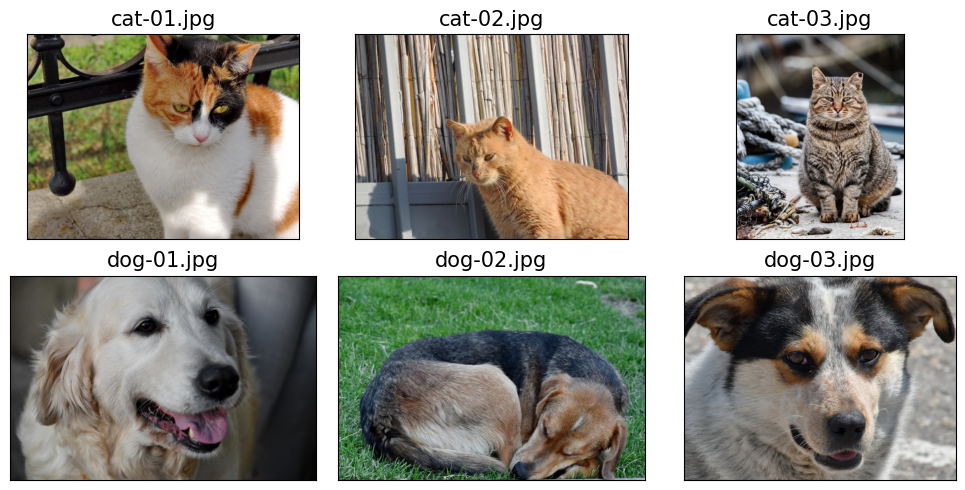

In [23]:
# Image sample 출력
import matplotlib.pyplot as plt
import os
from PIL import Image

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([]) # 눈금 제거
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

이제 파일 이름에서 **Label**을 추출하여 강아지는 1, 고양이는 0으로 설정한다.

In [24]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]

print(labels)

[0, 0, 0, 1, 1, 1]


이제 **Image data와 Label**이 준비되었으므로 **Joint dataset**을 만들 수 있다.

In [28]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        
        return file, label

    def __len(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list, labels)

for file, label in image_dataset:
    print(file, label)

cat_dog_images\cat-01.jpg 0
cat_dog_images\cat-02.jpg 0
cat_dog_images\cat-03.jpg 0
cat_dog_images\dog-01.jpg 1
cat_dog_images\dog-02.jpg 1
cat_dog_images\dog-03.jpg 1


아까 **Image.shape**에서 확인했듯이, 이미지마다 다른 형태를 가지고 있었으므로 **Joing dataset**에 변환을 적용해야 한다.

**torchvision.transforms module**을 이용하여 이미지의 크기를 조정하고 로드된 픽셀을 Tensor로 변환한다.

In [30]:
import torchvision.transforms as transforms
img_height, img_width = 80, 120

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width))
])

이제, 위에서 정의한 **transform**을 적용할 수 있도록 **ImageDataset class**를 수정할 수 있다.

이후 변한 이미지를 시각화해보자.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.000551827..1.0000002].


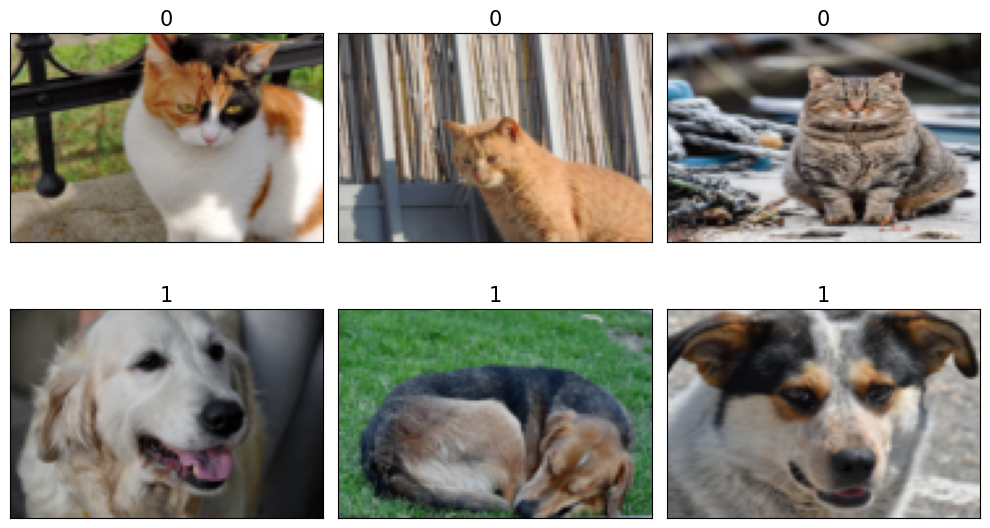

In [33]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
            
        label = self.labels[index]
        
        return img, label

    def __len(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list, labels, transform)

fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    # Transform의 ToTensor를 적용하면 (C, H, W) 로 바뀜
    # imshow()로 시각화하려면 (H, W, C) 형태가 필요 
    ax.imshow(example[0].numpy().transpose(1, 2, 0))
    ax.set_title(f'{example[1]}', size = 15)

plt.tight_layout()
plt.show()

**torchvision.datasets 라이브러리**에는 다양한 종류의 이미지 데이터셋이 제공된다.

먼저 **torchvision.datasets.CelebA**를 이용하여 **CelebA Dataset**을 가져와 볼 것이다.

이 데이터셋은 **train, valid, test** 세 개의 subset을 가지고 있고, **split** 매개변수를 이용하여 특정 subset이나 전체 subset을 사용할 수 있다.

**attributes, identity, landmarks**와 같은 다양한 종류의 타깃을 사용할 수 있다.

데이터셋의 다운로드의 문제가 있어 실습은 따로 코드 공부로 진행했다.

주요한 부분은 아래와 같다.

**isinstance(A, B)** 함수를 통해 A dataset이 B의 Instance가 맞는지 확인할 수 있었다.

___

**from itertools import islice**을 이용해 **islice(iterable, start, stop[, step])** 함수에 대해 알 수 있었다.

- **iterable**: 이터러블 객체 (ex. list, generator, DataLoader 등)

- **start**: 시작 인덱스 (생략 가능)

- **stop**: 종료 인덱스 (미포함)

- **step**: 몇 개씩 건너뛸지 (생략 가능)

교재에서는 **islice(enumerate(dataset), 시각화 할 data 개수)로** 사용했다.

**enumerate(dataset)**
→ [(0, dataset[0]), (1, dataset[1]), (2, dataset[2]), ...]
→ 이터레이터 형태로 인덱스와 데이터 쌍을 생성함

**islice(..., data 개수)**
→ 이터레이터에서 앞의 0~(data 개수 - 1)번까지 data 개수만큼의 요소만 슬라이스해서 반환

___

**iter()** 함수를 통해 Dataset을 iterable 객체로 만들 수 있었고, **next()** 함수를 통해 iterable 객체에서 첫 번째 원소를 꺼낼 수 있었다.